<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

The obective in a classification task is to assign class labels to input samples. Prior to the classification task, we train the classifier using training samples, where input samples and it's corresponding labels are provided. 

##System Model

 Let $(x_i,y_i)$ denote  the $i$th (training sample, class label) pair where $x_i $ denotes the training sample and $y_i$ denotes the class label. $x_i$ can be a feature vector and $y_i$ can take one among the finite class labels.
 
 ### Binary Classification
 When $y_i$ takes only two values, we denote the classification task as binary classification.
 
 For binary classification tasks, we will assume that the class labels will always belong to the set {-1.+1}
 
 



In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D






## Generate Synthetic Data

First, lets generate synthetic training data for a binary classification task. We will assume that the samples belong to two multivariate Gaussian distributions with different means but same co-variance matrix (we will further assume that the covariance matrix is the identity matrix).

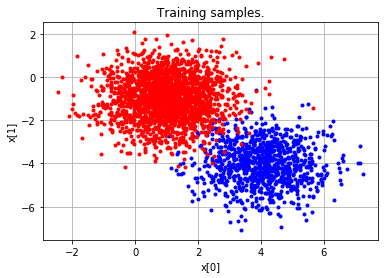

In [46]:
num_x1_samples = 1000 # number of samples from Class 1
num_x2_samples = 2000 # number of samples from Class 2

mu_1 = np.array([[4,-4]]).T # Mean of the points in Class 1
mu_2 = np.array([[1,-1]]).T # Mean of the points in Class 2

x1 = np.random.randn(num_x1_samples,2) + mu_1.T # Generate num_x1_samples points for Class 1, with mean of mu_1
y1 = np.ones((num_x1_samples,1)) # Assign a label of +1 to the samples from Class 1

x2 = np.random.randn(num_x2_samples,2) + mu_2.T # Generate num_x2_samples points for Class 2, with mean of mu_2
y2 = -1*np.ones((num_x2_samples,1)) # Assign a label of -1 to the samples from Class 2

x_train = np.concatenate((x1,x2),axis=0) # The training data will be a mix of the samples from Class 1 and Class 2. Here we are stacking the rows on top of each other
x_train = np.concatenate((x_train,np.ones((x_train[:,0].size,1))),axis=1) # We add an all ones column to the sample features. This is to account for any constant bias in the samples.
y_train = np.concatenate((y1,y2),axis=0) # Just as the sample points were concatenated, we need to concatenate the labels

#Shuffle training samples. The samples we obtain in practise might be in random order.
perm = np.random.permutation(y_train.size)

x_train = x_train[perm,:]
y_train = y_train[perm,:]


plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.grid()
plt.title("Training samples.")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.show()


### Linear Classifiers
 
 Classifiers of the form 
 
 $$\hat{y} = \begin{cases} 1 & \text{if } \quad h(w,x) > 0 \\ -1 & \text{otherwise} \end{cases} ,$$ where $h(w,x) = w^Tx$ is a linear function of the input sample $x$.
 
 ### Logistic Regression
 
 Logistic regression is a linear classifier. Logistic regression can be viewed as a maximum likelihood estimator under specific assumptions. 

Given the parameters of the logistic function $w$, let the likelihood of the class label $Y$ given the input variable $X = x$ be modelled as the logistic function
$$P(Y = 1 | X = x) = \frac{1}{1+e^{-w^Tx}}.$$

Then, given the parameters of the logistic function $w$, the likelihood for a given training sample can be written as
$$P(Y=y_i | X=x_i) =  \left(\frac{1}{1+e^{-w^Tx_i}}\right)^{\frac{1+y_i}{2}} \left(\frac{e^{-w^Tx_i}}{1+e^{-w^Tx_i}}\right)^{\frac{1-y_i}{2}}.$$

The log-likelihood of the entire training samples can then be written as

 \begin{align} \nonumber L(w) &= \sum_{i=1}^n \frac{(1+y_i)}{2} \log \left(\frac{1}{1+e^{-w^Tx_i}}\right) + \frac{(1-y_i)}{2} \log \left(\frac{e^{-w^Tx_i}}{1+e^{-w^Tx_i}}\right)\\
& = \sum_{i=1}^n \frac{(y_i-1)}{2} w^Tx_i+\log \left(\frac{1}{1+e^{-w^Tx_i}}\right).
\end{align}

The obective of the training in logistic regression is to obtain the parameter $w^*$ that maximizes the likelihood, i.e.,

$$w^* = \arg \max_w L(w).$$

There is no closed form expression for the optimum $w^*$. However, given that the objective function is convex in the optimization variable $w$, one can employ convex optimization techniques to obtain $w^*$. Particularly, we can use gradient descent based techniques to find $w^*$. The gradient of the objective function with respect to $w$ can be derived to be

\begin{align}
\nabla_{w}L(w) = \sum_{i=1}^n \frac{(y_i-1)}{2} x_i +  \left(\frac{1}{1+e^{w^Tx_i}}\right)x_i.
\end{align}

Converged w* =  [[ 1.10669542 -1.09931466 -5.63274972]]


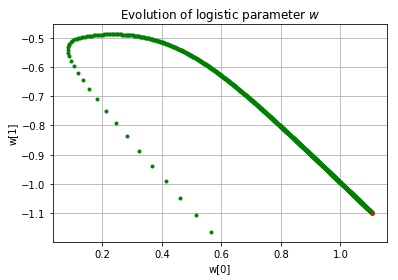

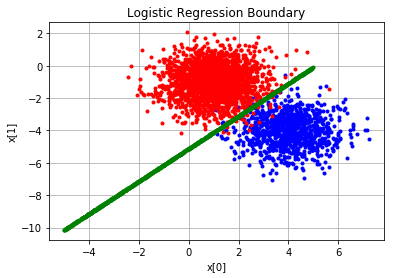

In [47]:
def get_grad(x,y,w):
  wT_x = np.matmul(x,w)
  temp = 1/(1+np.exp(wT_x))
  grad = np.matmul(x.T,(y-1)/2)+np.matmul(x.T,temp)
  
  grad = grad/(y.size)
  return grad


num_iter = 1000
w = np.random.randn(x_train[0,:].size,1)
w_evol = w
mu= 0.1
for iter_count in range(num_iter):
    grad = get_grad(x_train,y_train,w)
    w = w+mu*grad
    w_evol = np.concatenate((w_evol,w),axis=1)
    
print("Converged w* = ", w.T)
x1_plot = 10*np.random.rand(1000,1)-5
x2_plot = -(x1_plot*w[0,0]+w[2,0])/w[1,0]

plt.figure()
plt.plot(w_evol[0,:],w_evol[1,:],'.g')
plt.plot(w_evol[0,-1:],w_evol[1,-1:],'.r')
plt.title("Evolution of logistic parameter " r"$w$")
plt.xlabel("w[0]")
plt.ylabel("w[1]")
plt.grid()
plt.show()

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("Logistic Regression Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

## Logistic Regression using in-built implementation in Scikit-Learn Module

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression parameters from sklearn =  [[  1.95648574  -1.93208927 -10.07797324]]


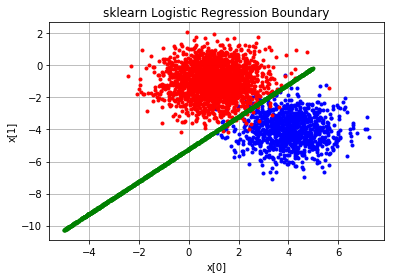

In [48]:
#Logistic Regression using sklearn in-built implementation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train[:,0:2],y_train[:,0]) #y_train[:,0] used only because fit() expects the labels to be a 1d array and not a column vector.
w_sklearn = np.array([np.append(log_reg.coef_,log_reg.intercept_)])

print("Logistic Regression parameters from sklearn = ", w_sklearn)


#x1_plot = 10*np.random.rand(1000,1)-5
x2_plot = -(x1_plot*w_sklearn.T[0,0]+w_sklearn.T[2,0])/w_sklearn.T[1,0]

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("sklearn Logistic Regression Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

### Perceptron

Perceptron is a simple linear classifier based on a very simple neural network model. Perceptron classifier can be modelled as
\begin{align}
\nonumber y &= sign(w^Tx)\\
\nonumber & = sign\left(\sum_{k=1}^K w_kx_k\right),
\end{align}
where $sign(x) = 1$ if $x >0$ and $sign(x) = -1$ if $x \le 0$.

#### Training a perceptron
Perceptron training is done on a sample by sample basis. Whenever the current model encounters an error, the perceptron weights are updated. The weight updation rule in perceptron training for training sample $(x_i,y_i)$ is given by

\begin{align}
\nonumber w = w + \nabla_w,
\end{align}
where 

\begin{align}
\nabla_w = \begin{cases} &2 \eta y_i x_i & \text{if }  {y_i \ne sign(w^Tx_i)} \\ 
& 0 & \text{otherwise}
\end{cases},
\end{align}
where $\eta$ is the learning rate. 

Perceptron weights =  [[ 0.25986695 -0.34990108 -1.53975517]]


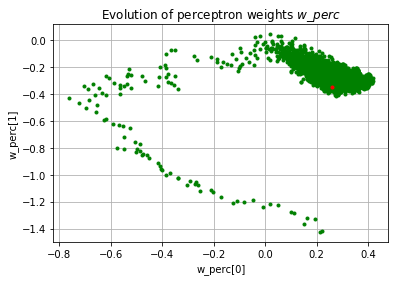

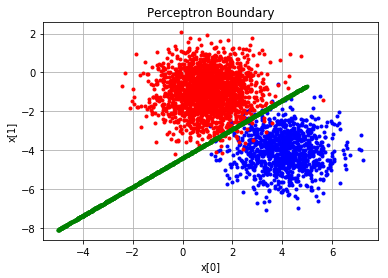

In [55]:
#Perceptron training
#Shuffle training samples. In the logistic regression example, the samples where not randomized
#perm = np.random.permutation(y_train.size)

x_train_1 = x_train #[perm,:]
y_train_1 = y_train #[perm,:]
#y_train_1 = 2*y_train_1-1 # relabel zeros by -1


w_perc = np.random.randn(x_train[0,:].size,1)
w_perc_evol = w_perc
eta = 0.01

num_outer_loop = 50
for count_outer_loop in range(num_outer_loop):
  for count_inner in range(y_train.size):
    if (y_train_1[count_inner,0]*np.matmul(x_train_1[count_inner,:],w_perc)) < 0:
      w_perc = w_perc + (2*eta*y_train_1[count_inner,0])*x_train_1[count_inner:count_inner+1,:].T
      w_perc_evol = np.concatenate((w_perc_evol,w_perc),axis=1)
      
print("Perceptron weights = ", w_perc.T)

x2_plot = -(x1_plot*w_perc[0,0]+w_perc[2,0])/w_perc[1,0]
plt.figure()
plt.plot(w_perc_evol[0,:],w_perc_evol[1,:],'.g')
plt.plot(w_perc_evol[0,-1:],w_perc_evol[1,-1:],'.r')
plt.title("Evolution of perceptron weights " r"$w\_perc$")
plt.xlabel("w_perc[0]")
plt.ylabel("w_perc[1]")
plt.grid()
plt.show()

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("Perceptron Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

    
    

## Exercises
* Create a function that computes the accuracy of a linear classifier.
* What happens to the logistic regression classifier and the perceptron classifier if the samples are not stacked randomly (i.e., the permutation operation done at time of generation of samples is not performed).

# Classification using public datasets

* We will try to do classification on a publically available datasets.


## Audit dataset from India, curated by a group from Thapar University - Datset available  [here](https://archive.ics.uci.edu/ml/datasets/Audit+Data)

### Download and extract dataset

In [28]:
!rm -rf audit* # Remove earlier copies of the dataset if any
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip'
from zipfile import ZipFile # import module to extract data from a zip file
zip = ZipFile('audit_data.zip') 
zip.extractall() # extract data from zip file
!ls -l

--2019-07-08 19:56:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28447 (28K) [application/x-httpd-php]
Saving to: ‘audit_data.zip’

audit_data.zip      100%[===================>]  27.78K  --.-KB/s    in 0.03s   

2019-07-08 19:56:27 (897 KB/s) - ‘audit_data.zip’ saved [28447/28447]

total 2384
drwxr-xr-x 2 root root    4096 Jul  8 19:56  audit_data
-rw-r--r-- 1 root root   28447 Jul 14  2018  audit_data.zip
-rw-r--r-- 1 root root   44267 Jul  8 18:06  chronic_kidney_disease.arff
-rw-r--r-- 1 root root   47276 Jul  8 18:06  chronic_kidney_disease_full.arff
-rw-r--r-- 1 root root    2924 Jul  4  2015  chronic_kidney_disease.info.txt
-rw-r--r-- 1 root root   19260 Jul  4  2015  Chronic_Kidney_Disease.rar
-rw-r--r-- 1 root root   23755 May 

### Load data into Python as a Pandas dataframe

In [56]:
!ls -l audit_data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_AUD = pd.read_csv('audit_data/audit_risk.csv') #load data as a pandas dataframe
df_AUD.head()


total 120
-rw-r--r-- 1 root root 81197 Jul  8 19:56 audit_risk.csv
-rw-r--r-- 1 root root 39965 Jul  8 19:56 trial.csv


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [57]:
df_AUD.describe() # Summary statistic of the different features

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object
Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            Fa

<Figure size 648x432 with 0 Axes>

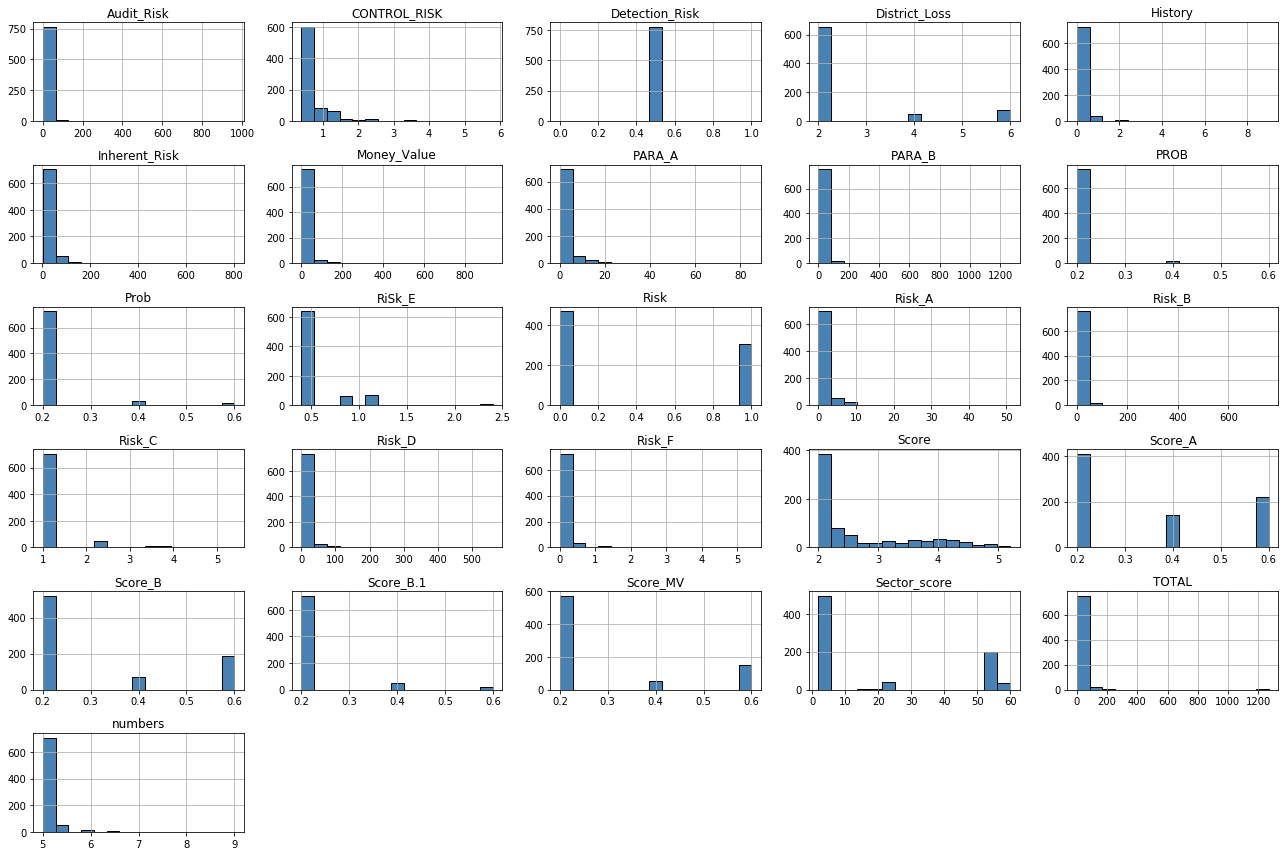

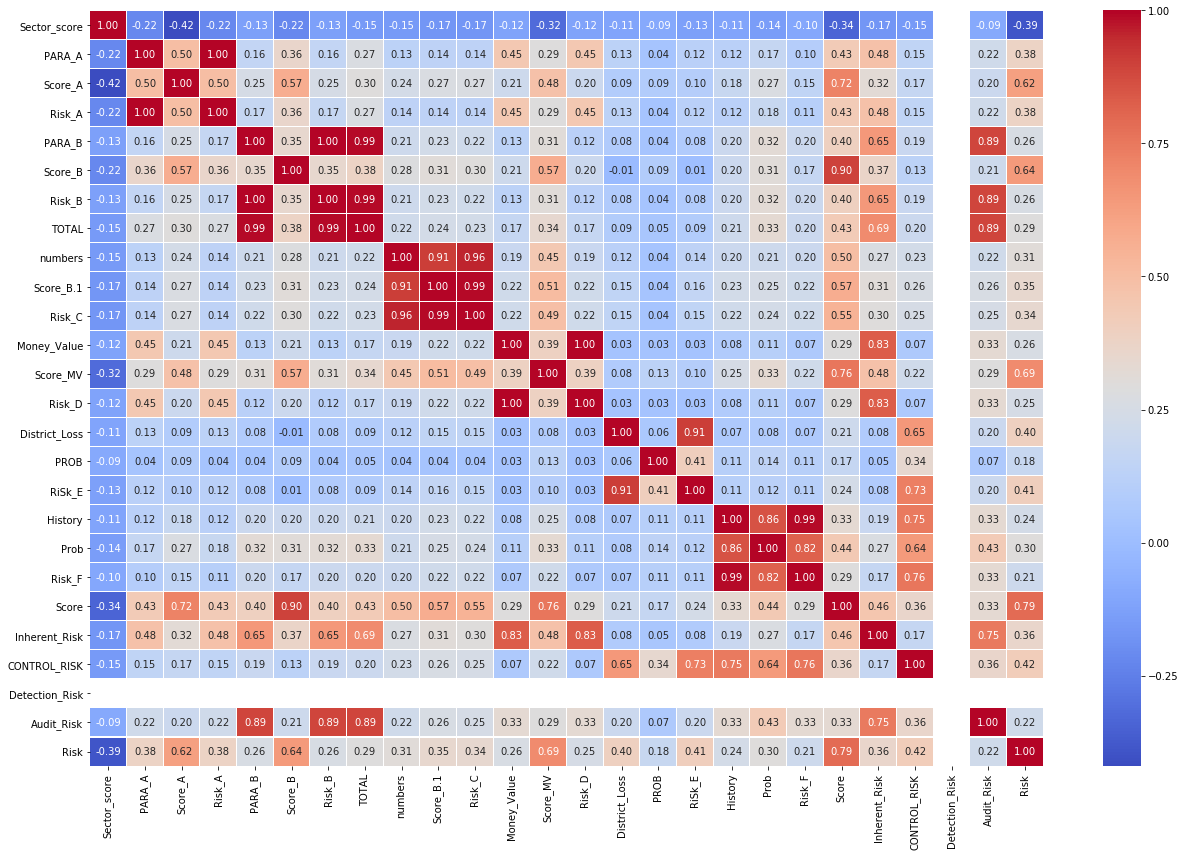

In [58]:
print(df_AUD.dtypes)
#print(df_AUD.mean()) # display the mean across different columns

print(df_AUD.isna().any()) # display if any column have nan values

#df_AUD = df_AUD.fillna(df_AUD.mean()) # replace nan with mean values. One could replace it with 0, mean or any other value. One could even remove records have missing values
df_AUD = df_AUD.dropna() # Drop records that have missing values or NaN values


df_AUD.drop(columns='LOCATION_ID',inplace=True) # Drop the column corresponding to LOCATION_ID

plt.figure(figsize=(9,6))
df_AUD.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=True,figsize=(18,12))
plt.tight_layout()
plt.show() # Plot the histogram of the different features


corr = df_AUD.corr()
plt.figure(figsize=(18,12))
hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
plt.tight_layout() # Plot the correlation between the different features

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


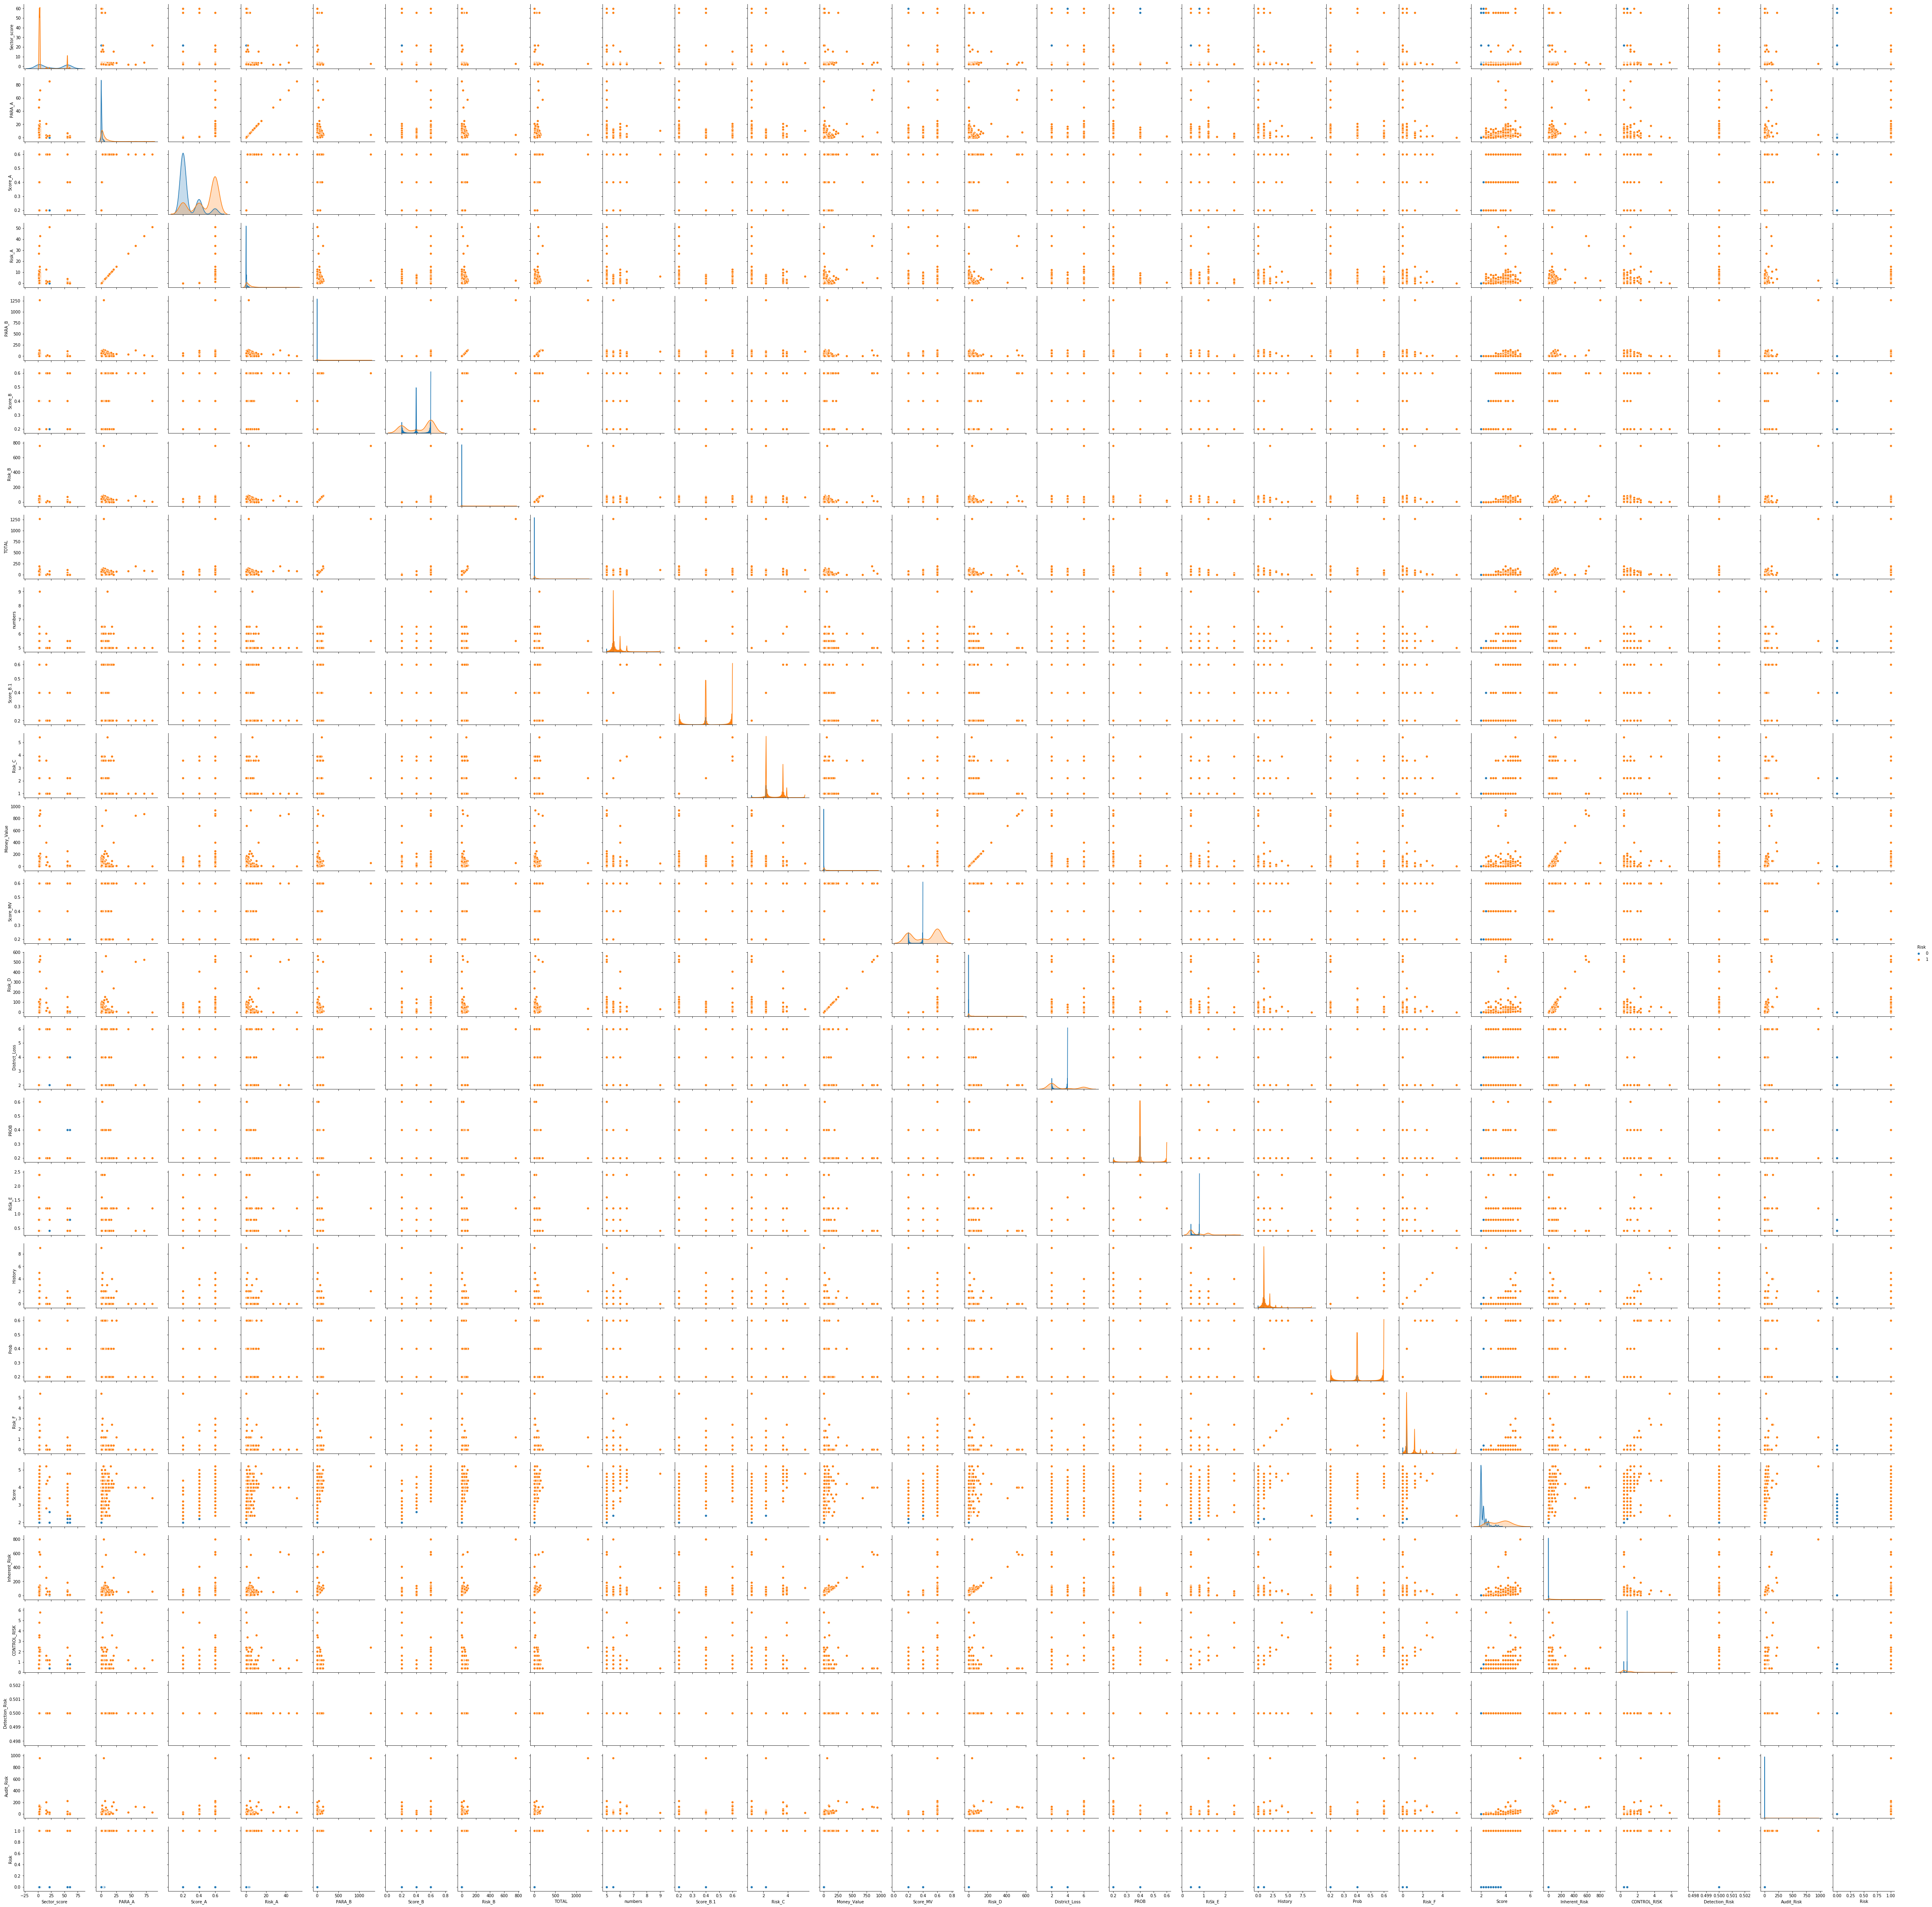

In [59]:
sns.pairplot(df_AUD, hue="Risk",diag_kind="kde")

[]
[]
Classification score =  0.9935483870967742


[Text(602.6400000000001, 317.09999999999997, 'Inherent_Risk <= 4.972\nentropy = 0.483\nsamples = 465\nvalue = [275, 190]\nclass = non-Risky'),
 Text(401.76000000000005, 190.26, 'CONTROL_RISK <= 1.0\nentropy = 0.153\nsamples = 300\nvalue = [275, 25]\nclass = non-Risky'),
 Text(200.88000000000002, 63.420000000000016, 'entropy = 0.028\nsamples = 279\nvalue = [275, 4]\nclass = non-Risky'),
 Text(602.6400000000001, 63.420000000000016, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]\nclass = Risky'),
 Text(803.5200000000001, 190.26, 'entropy = 0.0\nsamples = 165\nvalue = [0, 165]\nclass = Risky')]

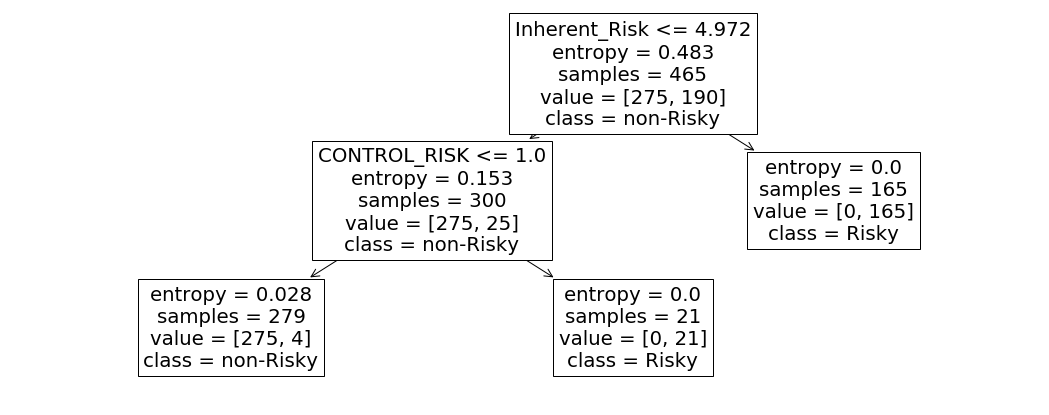

In [60]:
data_array = df_AUD.to_numpy() # convert pandas dataframe to a numpy array
x_data = data_array[:,0:-2] #
y_data = data_array[:,-1]

data_labels = df_AUD.columns

x_labels = data_labels[0:-2]
y_labels = ['non-Risky','Risky']

print(np.argwhere(np.isnan(x_data)))
print(np.argwhere(np.isnan(y_data)))


from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_data)
#x_data = scaler.fit_transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4,random_state=42)

classifier = DecisionTreeClassifier(max_depth=2) #LogisticRegression(penalty='l2')
classifier.fit(x_train,y_train) #y_train[:,0] used only because fit() expects the labels to be a 1d array and not a column vector.
#w_sklearn = np.array([np.append(classifier.coef_,classifier.intercept_)]) # For linear regressors : LogisticRgression,Perceptron
#print("Classification coefficients", w_sklearn) #For linear regressors: LogisticREgression, Perceptron


print("Classification score = ", classifier.score(x_test,y_test)) #Works for all classifiers
#print("[Test prediction, True Label, Test probabilities] = ", np.concatenate((np.array([classifier.predict(x_test),y_test]).T,np.round(classifier.predict_proba(x_test),2)),axis=1)) # Works for LogisticRegression


plt.figure(figsize=(18,7)) #Works for DecisionTreeClassifier
sklearn.tree.plot_tree(classifier.fit(x_train, y_train),feature_names=x_labels,class_names=y_labels) #Works for DecisionTreeClassifier

### Dataset 2 - We will use the Indian Liver Disease Dataset avaialble at https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29

In [31]:
# download dataset from source
!rm -rf Indian* # Remove earlier copies of the dataset if any
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv'
!ls -l

--2019-07-08 19:56:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23755 (23K) [application/x-httpd-php]
Saving to: ‘Indian Liver Patient Dataset (ILPD).csv’

Indian Liver Patien 100%[===================>]  23.20K  --.-KB/s    in 0.03s   

2019-07-08 19:56:50 (766 KB/s) - ‘Indian Liver Patient Dataset (ILPD).csv’ saved [23755/23755]

total 2384
drwxr-xr-x 2 root root    4096 Jul  8 19:56  audit_data
-rw-r--r-- 1 root root   28447 Jul 14  2018  audit_data.zip
-rw-r--r-- 1 root root   44267 Jul  8 18:06  chronic_kidney_disease.arff
-rw-r--r-- 1 root root   47276 Jul  8 18:06  chronic_kidney_disease_full.arff
-rw-r--r-- 1 root root    2924 Jul  4  2015  chronic_kidney_disease.info.txt
-rw-r--r-- 1 root root  

In [0]:
import numpy as np
import pandas as pd
from scipy.io import arff



In [33]:
df_LD = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None) #load data as a pandas dataframe
df_LD.columns= ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'SGPT', 'SGOT','TP','ALB','A/G','LD'] #if columns are not spcified in the source file, assign column names
df_LD.head() # display first 5 records



,Age,Gender,TB,DB,Alkphos,SGPT,SGOT,TP,ALB,A/G,LD
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [34]:
df_LD.describe() # display a summary of the dataset

,Age,TB,DB,Alkphos,SGPT,SGOT,TP,ALB,A/G,LD
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


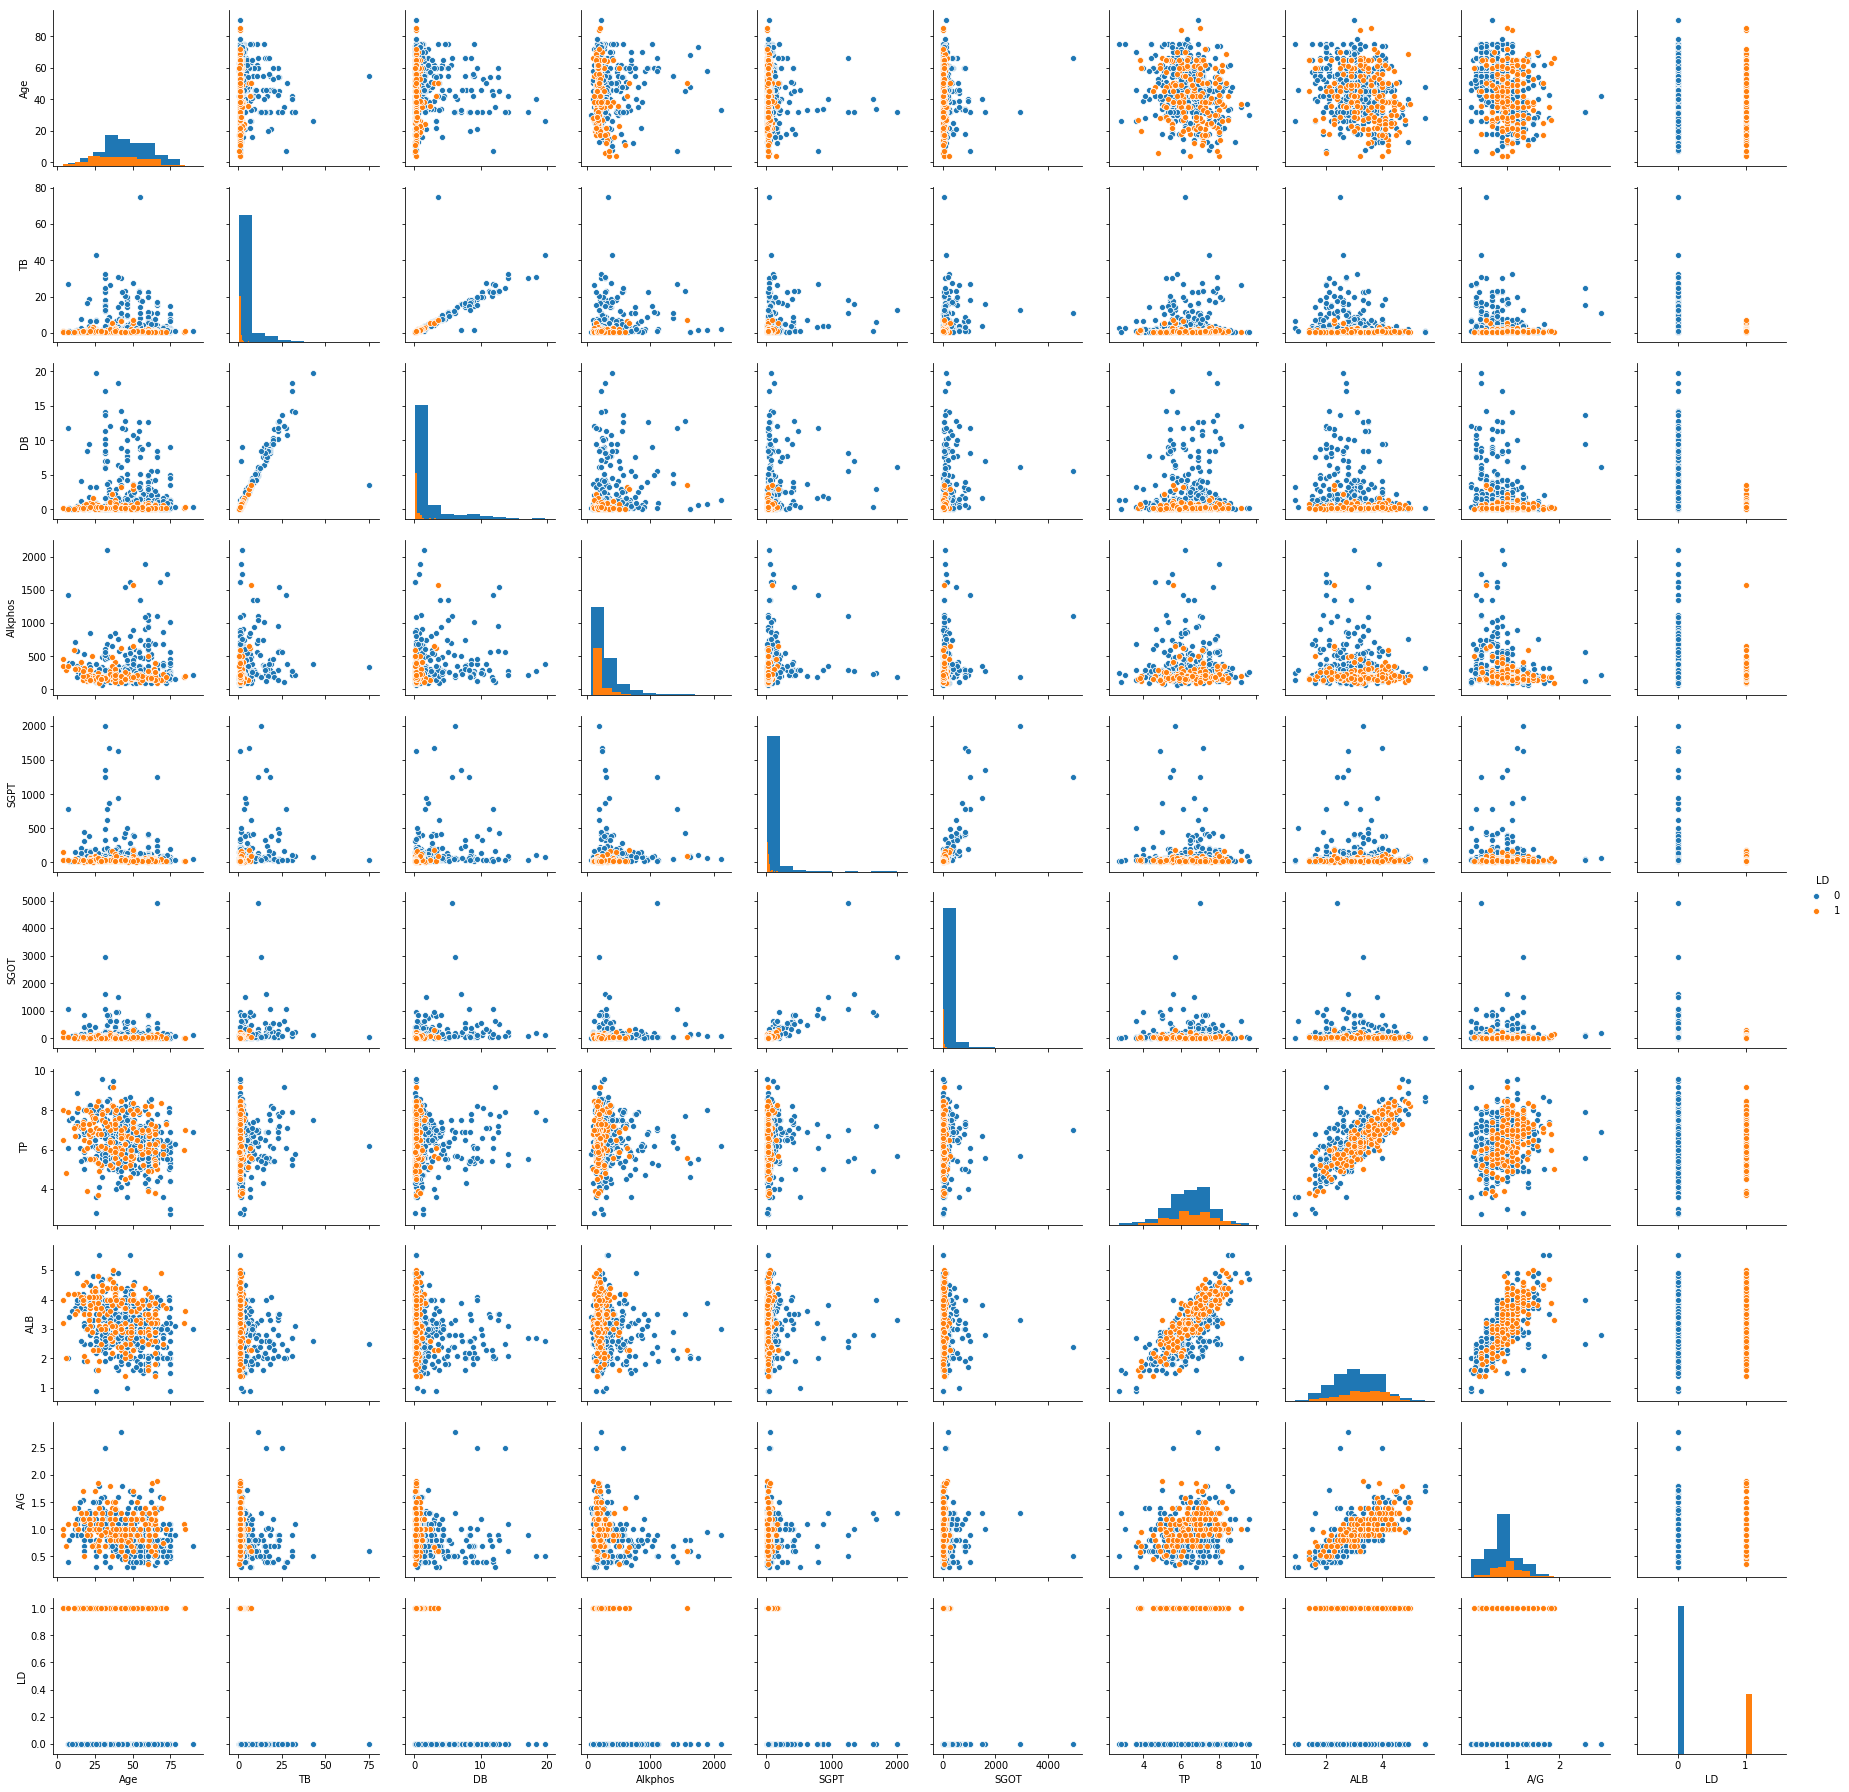

In [61]:
sns.pairplot(df_LD, hue="LD",diag_kind="hist")

In [35]:
df_LD=df_LD[['Age', 'TB', 'DB', 'Alkphos', 'SGPT', 'SGOT','TP','ALB','A/G','LD']] # remove the gender columns for the timebeing

print(df_LD.mean()) # display the mean across different columns
print(df_LD.isna().any()) # display if any column have nan values

df_LD = df_LD.fillna(df_LD.mean()) # replace nan with mean values. One could replace it with 0, mean or any other value. One could even remove records have missing values
print(df_LD.isna().any()) # display if any column have nan values

df_LD = df_LD.apply(pd.to_numeric,errors='coerce') #convert all entries to numeric values

df_LD['LD']=df_LD[['LD']]-1 # 

Age         44.746141
TB           3.298799
DB           1.486106
Alkphos    290.576329
SGPT        80.713551
SGOT       109.910806
TP           6.483190
ALB          3.141852
A/G          0.947064
LD           1.286449
dtype: float64
Age        False
TB         False
DB         False
Alkphos    False
SGPT       False
SGOT       False
TP         False
ALB        False
A/G         True
LD         False
dtype: bool
Age        False
TB         False
DB         False
Alkphos    False
SGPT       False
SGOT       False
TP         False
ALB        False
A/G        False
LD         False
dtype: bool


In [65]:
data_array = df_LD.to_numpy() # convert pandas dataframe to a numpy array
x_data = data_array[:,[0,2,3,4,5,6,7,8]] #
y_data = data_array[:,9]


data_labels = df_LD.columns
print(data_labels)
x_labels = data_labels[[0,2,3,4,5,6,7,8]]
y_labels = ['non-LD','LD']


print(np.argwhere(np.isnan(x_data)))
print(np.argwhere(np.isnan(y_data)))


from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_data)
x_data = scaler.fit_transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=42)

classifier = LogisticRegression() #LogisticRegression(penalty='l1')
classifier.fit(x_train,y_train) #y_train[:,0] used only because fit() expects the labels to be a 1d array and not a column vector.
w_sklearn = np.array([np.append(classifier.coef_,classifier.intercept_)])
print("Classification coefficients", w_sklearn)


print("Classification score = ", classifier.score(x_test,y_test))
print("[Test prediction, True Label, Test probabilities] = ", np.concatenate((np.array([classifier.predict(x_test),y_test]).T,np.round(classifier.predict_proba(x_test),2)),axis=1))

#plt.figure(figsize=(18,12)) #Works for DecisionTreeClassifier
#sklearn.tree.plot_tree(classifier.fit(x_train, y_train),feature_names=x_labels,class_names=y_labels) #Works for DecisionTreeClassifier

Index(['Age', 'TB', 'DB', 'Alkphos', 'SGPT', 'SGOT', 'TP', 'ALB', 'A/G', 'LD'], dtype='object')
[]
[]
Classification coefficients [[-0.16663113 -0.83265071 -0.29933968 -1.24057003 -0.73512478 -0.64379381
   0.92488492 -0.26542263 -1.48208686]]
Classification score =  0.7485714285714286
[Test prediction, True Label, Test probabilities] =  [[1.   1.   0.43 0.57]
 [0.   0.   0.84 0.16]
 [0.   0.   1.   0.  ]
 [0.   0.   0.79 0.21]
 [0.   0.   0.95 0.05]
 [0.   0.   0.63 0.37]
 [0.   1.   0.56 0.44]
 [0.   1.   0.62 0.38]
 [1.   1.   0.49 0.51]
 [0.   0.   0.81 0.19]
 [0.   1.   0.62 0.38]
 [0.   0.   0.86 0.14]
 [1.   1.   0.49 0.51]
 [0.   0.   0.52 0.48]
 [0.   0.   0.98 0.02]
 [0.   0.   0.87 0.13]
 [0.   0.   0.64 0.36]
 [0.   0.   0.63 0.37]
 [0.   0.   0.82 0.18]
 [0.   0.   0.74 0.26]
 [0.   0.   0.63 0.37]
 [0.   0.   0.74 0.26]
 [0.   0.   0.92 0.08]
 [0.   0.   0.73 0.27]
 [0.   0.   0.83 0.17]
 [0.   0.   0.72 0.28]
 [0.   0.   0.92 0.08]
 [0.   1.   0.86 0.14]
 [0.   0.   0.65

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
